<a href="https://colab.research.google.com/github/dgalassi99/quant-trading-self-study/blob/main/01_foundations/W1_ohlcv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#import main libraries

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
#get 5 years data with daily frequency for the specified tickers
tickers = ['AAPL','SPY','BTC']
data = yf.download(tickers,period='5y',interval='1d')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [13]:
data.isna().sum()

Price   Ticker
Close   AAPL         0
        BTC       1079
        SPY          0
High    AAPL         0
        BTC       1079
        SPY          0
Low     AAPL         0
        BTC       1079
        SPY          0
Open    AAPL         0
        BTC       1079
        SPY          0
Volume  AAPL         0
        BTC       1079
        SPY          0
dtype: int64

In [14]:
#since the analysis is a comparison between the 3 I will drop all the rows containng missimg values
data.dropna(inplace=True)
data.isna().sum()

Price   Ticker
Close   AAPL      0
        BTC       0
        SPY       0
High    AAPL      0
        BTC       0
        SPY       0
Low     AAPL      0
        BTC       0
        SPY       0
Open    AAPL      0
        BTC       0
        SPY       0
Volume  AAPL      0
        BTC       0
        SPY       0
dtype: int64

In [26]:
#calculating daily returns and total return (over the entire period)
total_returns = {}
for ticker in tickers:
    data[f'{ticker}_return'] = data['Close'][ticker].pct_change() #daily return by iterating over the tickers anc calculating the daily pct_change
    first_close = data['Close'][ticker].iloc[0] #fisrt closing for each ticker
    last_close = data['Close'][ticker].iloc[-1] #last closing for each ticker
    total_return = (last_close - first_close)/first_close #total return for each ticker
    total_returns[ticker] = total_return #storing the total return for each ticker in a dictionary

{'AAPL': np.float64(-0.1122550693417103),
 'SPY': np.float64(-0.02889392205914134),
 'BTC': np.float64(0.2822106374312844)}

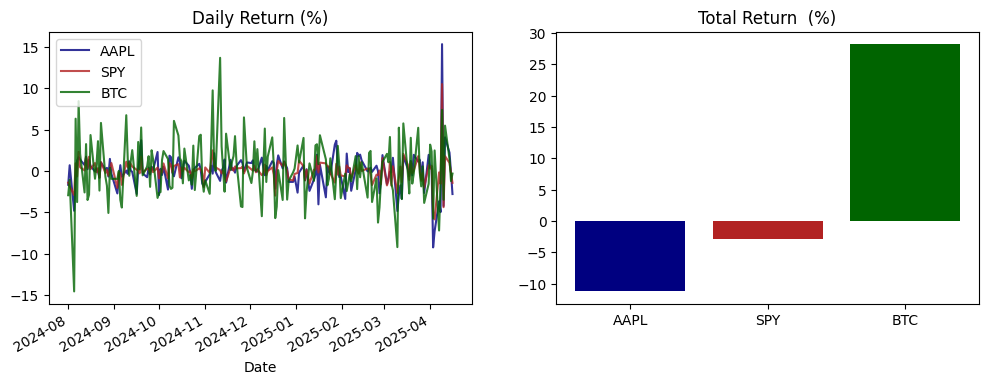

In [57]:
#plotting the daily return over the full period and as well the total retur
colors = ['navy','firebrick','darkgreen']
fig, axes = plt.subplots(1,2,figsize=(12,4))
for i,ticker in enumerate(tickers): #itereate along ticekr and index to change color
    (data[f'{ticker}_return']*100).plot(ax=axes[0], label = ticker, alpha = 0.8,color = colors[i]) #lineplot
    axes[1].bar(ticker,total_returns[ticker]*100,color=colors[i]) #bar plot

    axes[0].set_title('Daily Return (%)')
    axes[1].set_title('Total Return  (%)')


axes[0].legend(loc='upper left')

In [58]:
#let's now calculate the volatility
#to make things easy a create a dataframe for the daily returns
daily_returns = pd.DataFrame()
for ticker in tickers:
    daily_returns[ticker] = data['Close'][ticker].pct_change()

,AAPL,SPY,BTC
Date,,,
2024-07-31,NaN,NaN,NaN
2024-08-01,-0.016751,-0.014161,-0.029361
2024-08-02,0.006869,-0.018618,-0.010676
2024-08-05,-0.048167,-0.029124,-0.145683
2024-08-06,-0.009748,0.009220,0.063158
...,...,...,...
2025-04-10,-0.042394,-0.043819,-0.034795
2025-04-11,0.040594,0.017843,0.054783
2025-04-14,0.022054,0.009701,0.014532


In [59]:
#main statistics for the daily returns
daily_returns.describe()

,AAPL,SPY,BTC
count,178.000000,178.000000,178.000000
mean,-0.000440,-0.000069,0.002019
std,0.021556,0.013958,0.035352
min,-0.092456,-0.058543,-0.145683
25%,-0.007311,-0.004402,-0.020094
50%,0.001187,0.000643,0.000000
75%,0.010270,0.005726,0.024128
max,0.153289,0.105019,0.136765


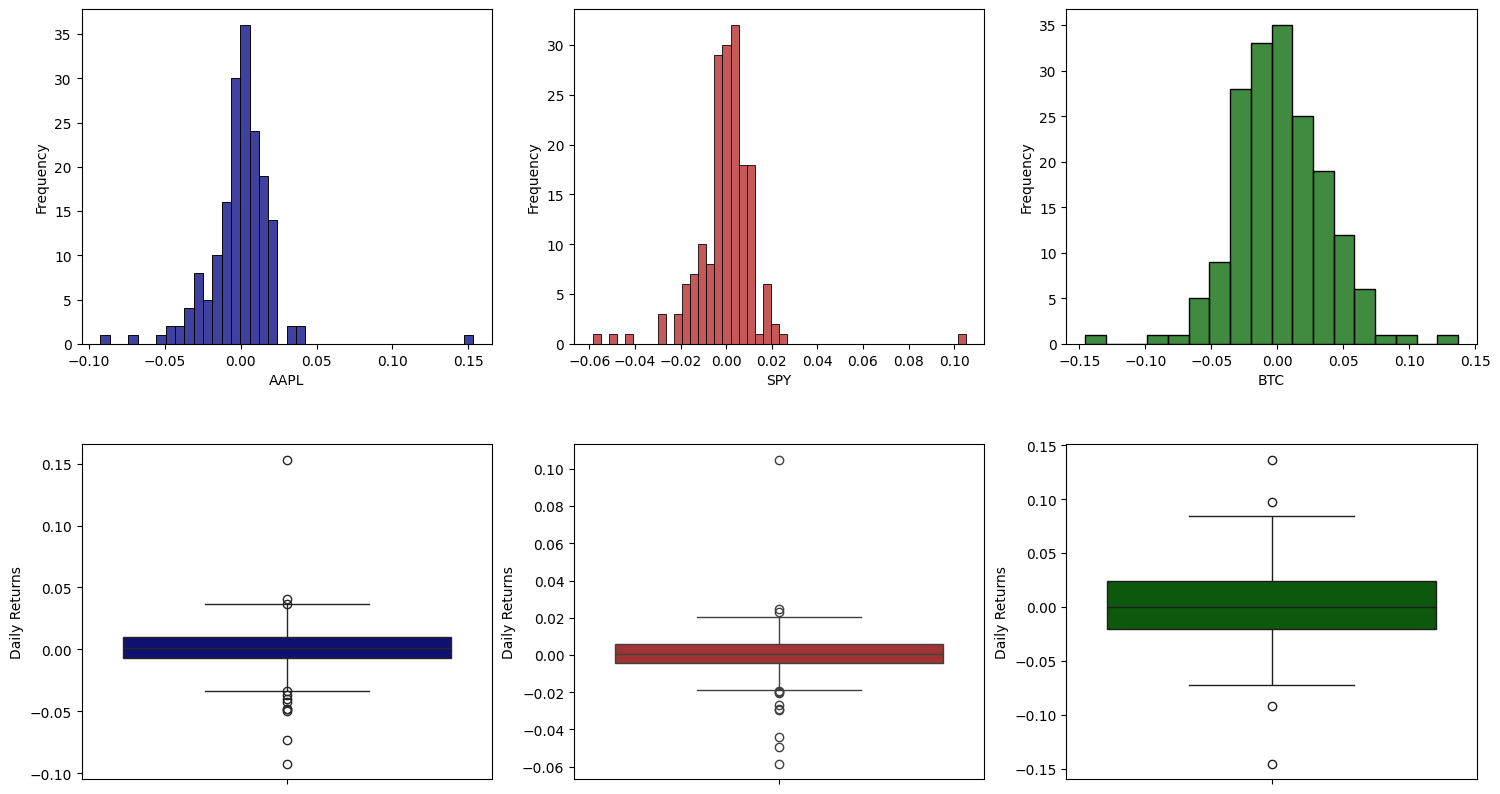

In [71]:
#distributions and boxplots for the daily returns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#histograms (Distribution) in the first row
for i, ticker in enumerate(tickers):
    sns.histplot(daily_returns[ticker], kde=False, ax=axes[0, i], color=colors[i])
    axes[0, i].set_ylabel('Frequency')
#boxplots in the second row
for i, ticker in enumerate(tickers):
    sns.boxplot(y=daily_returns[ticker], ax=axes[1, i], color=colors[i])
    axes[1, i].set_ylabel('Daily Returns')
#adjusting the space between distributions and boxplots
plt.subplots_adjust(hspace=0.3)

We can observe from the distribution of the daily returns that BTC is more volatily than AAPL and SPY.
Other than for an outlier +-10% daily return for AAPL and SPY (due to Trump releasing and blocking tariffs) we usually expect a more center distribution and less skewed than BTC

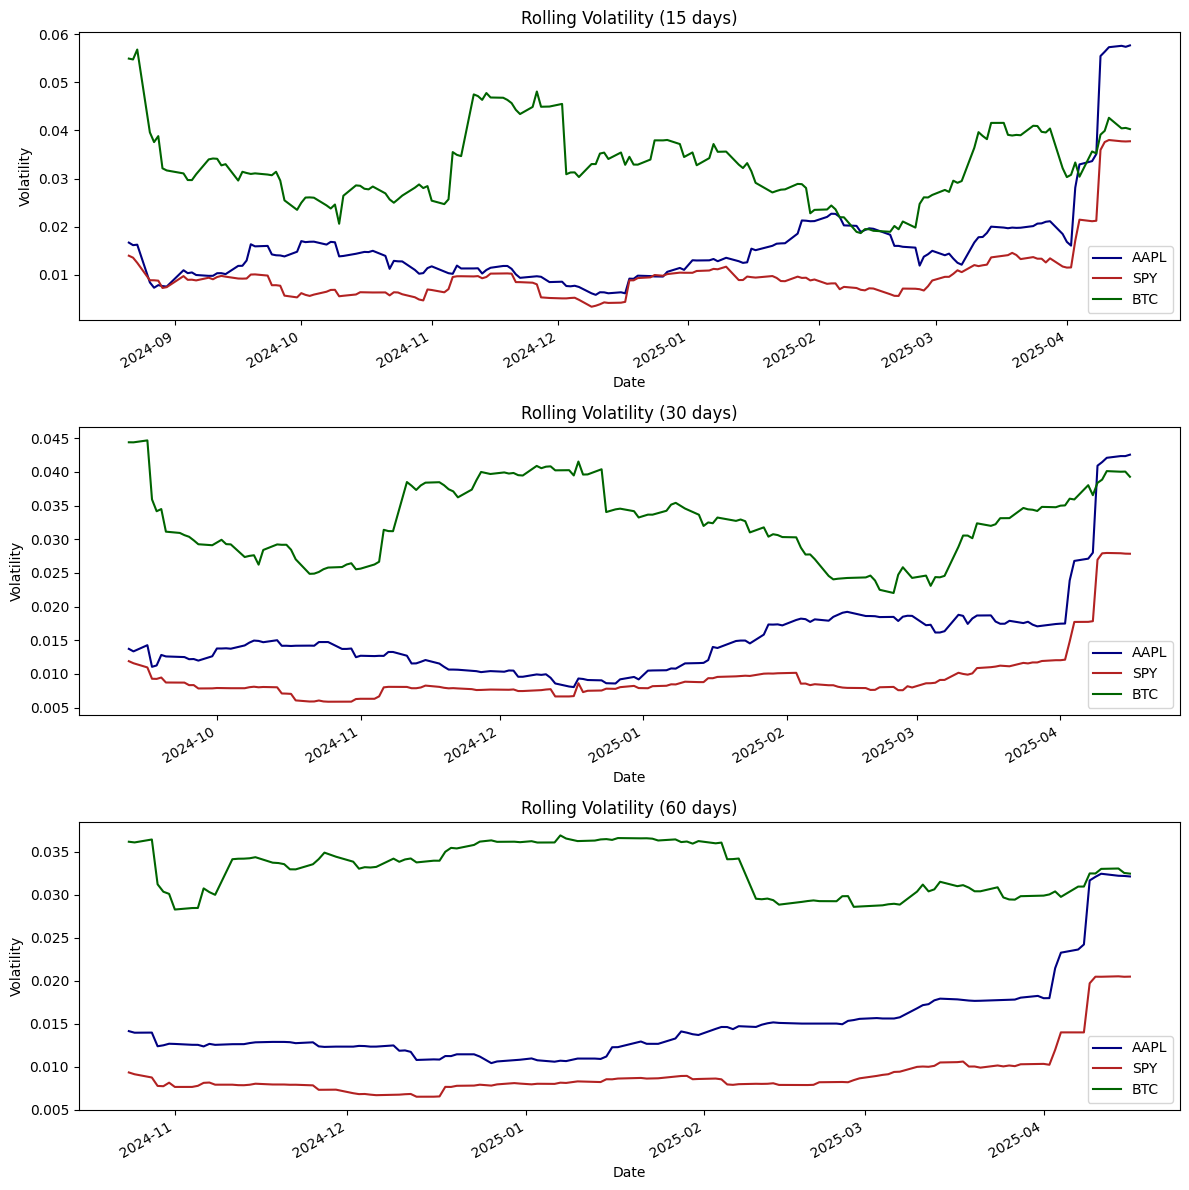

In [79]:
windows = [15,30,60]
rolling_volatility_half = daily_returns.rolling(window=windows[0]).std()
rolling_volatility = daily_returns.rolling(window=windows[1]).std()
rolling_volatility_twice = daily_returns.rolling(window=windows[2]).std()
volatility_data = [rolling_volatility_half, rolling_volatility, rolling_volatility_twice]

fig, axes = plt.subplots(len(windows), 1, figsize=(12, 12)) # Create subplots based on window sizes

for i, (vol_data, window) in enumerate(zip(volatility_data, windows)):
    ax = axes[i]  # Get the subplot for the current window
    for j, ticker in enumerate(tickers):
        vol_data[ticker].plot(ax=ax, label=ticker, color=colors[j]) # Plot for each ticker
    ax.set_title(f'Rolling Volatility ({window} days)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volatility')
    ax.legend()  # Add a legend

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

The observation we made before on volatility s confirmed by observing how the 15,30 and 60 days rolling volatility for BTC is always higher thant for AAPL and SPY (exception last period again bc of Trump policies)

In [110]:
#let's now calcualte rolling averages (let's just do it for BTC) and for a shorter timeframe (1hour)
btc_data = yf.download('BTC-USD', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [111]:
#only closing prices
btc = btc_data[['Close']]
btc.isna().sum()
#let's calcualte the 20 and 50 MA
btc['20ma'] = btc['Close'].rolling(window=20).mean()
btc['50ma'] = btc['Close'].rolling(window=50).mean()

<ipython-input-111-84e42c24386c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['20ma'] = btc['Close'].rolling(window=20).mean()
<ipython-input-111-84e42c24386c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['50ma'] = btc['Close'].rolling(window=50).mean()


In [112]:
btc

Price,Close,20ma,50ma
Ticker,BTC-USD,,
Datetime,,,
2024-04-16 15:00:00+00:00,61914.695312,NaN,NaN
2024-04-16 16:00:00+00:00,62482.144531,NaN,NaN
2024-04-16 17:00:00+00:00,62379.781250,NaN,NaN
2024-04-16 18:00:00+00:00,62986.125000,NaN,NaN
2024-04-16 19:00:00+00:00,62777.230469,NaN,NaN
...,...,...,...
2025-04-16 11:00:00+00:00,84029.796875,83831.898828,84590.997656
2025-04-16 12:00:00+00:00,83770.179688,83779.540625,84572.800937


<ipython-input-99-799abb832c9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['20ma'] = btc.rolling(window=20).mean()


ValueError: Cannot set a DataFrame with multiple columns to the single column 50ma